In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

from data_read import load_data_into_dataframe

sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


#enable IPython to display matplolib graphs
%matplotlib inline

/home/daniel/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
h_df = pd.read_csv('./data/ouput.csv')
h_df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000168,2011-11-24 13:30:00,0.054
1,MAC000168,2011-11-24 14:00:00,0.178
2,MAC000168,2011-11-24 14:30:00,0.113
3,MAC000168,2011-11-24 15:00:00,0.068
4,MAC000168,2011-11-24 15:30:00,0.061


In [3]:
h_df.shape

(396562, 3)

In [4]:
h_df.describe

<bound method NDFrame.describe of             LCLid                 tstp energy(kWh/hh)
0       MAC000168  2011-11-24 13:30:00         0.054 
1       MAC000168  2011-11-24 14:00:00         0.178 
2       MAC000168  2011-11-24 14:30:00         0.113 
3       MAC000168  2011-11-24 15:00:00         0.068 
4       MAC000168  2011-11-24 15:30:00         0.061 
...           ...                  ...            ...
396557  MAC000150  2014-02-27 22:00:00         0.631 
396558  MAC000150  2014-02-27 22:30:00         0.178 
396559  MAC000150  2014-02-27 23:00:00         0.108 
396560  MAC000150  2014-02-27 23:30:00         0.078 
396561  MAC000150  2014-02-28 00:00:00         0.113 

[396562 rows x 3 columns]>

In [5]:
h_df.dtypes

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [6]:
h_df["tstp"]

0         2011-11-24 13:30:00
1         2011-11-24 14:00:00
2         2011-11-24 14:30:00
3         2011-11-24 15:00:00
4         2011-11-24 15:30:00
                 ...         
396557    2014-02-27 22:00:00
396558    2014-02-27 22:30:00
396559    2014-02-27 23:00:00
396560    2014-02-27 23:30:00
396561    2014-02-28 00:00:00
Name: tstp, Length: 396562, dtype: object

In [7]:
h_df["tstp"] = pd.to_datetime(h_df["tstp"])

In [8]:
h_df.loc[0,"tstp"].year

2011

In [9]:
h_df = h_df.set_index("tstp")

In [10]:
h_df["energy(kWh/hh)"] = pd.to_numeric(h_df["energy(kWh/hh)"], downcast="float", errors="coerce")

In [11]:
hh_filt = h_df["LCLid"] == "MAC000150"
hh_df = h_df[hh_filt]
#hh_df = hh_df.resample("H").sum()
#aff_hh_df = aff_hh_df.set_index("tstp")

In [12]:
hh_df.head()

,LCLid,energy(kWh/hh)
tstp,,
2011-11-23 10:00:00,MAC000150,0.301
2011-11-23 10:30:00,MAC000150,0.127
2011-11-23 11:00:00,MAC000150,0.201
2011-11-23 11:30:00,MAC000150,0.564
2011-11-23 12:00:00,MAC000150,0.159


In [13]:
hh_df.dtypes

LCLid              object
energy(kWh/hh)    float32
dtype: object

<AxesSubplot:xlabel='tstp', ylabel='kWh'>

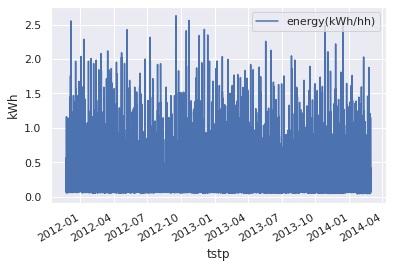

In [14]:
hh_df.plot( y ="energy(kWh/hh)", ylabel = "kWh")

In [15]:
unique_households = h_df["LCLid"].unique()
unique_households

array(['MAC000168', 'MAC000169', 'MAC000179', 'MAC000181', 'MAC000165',
       'MAC000173', 'MAC000152', 'MAC000153', 'MAC000159', 'MAC000150'],
      dtype=object)

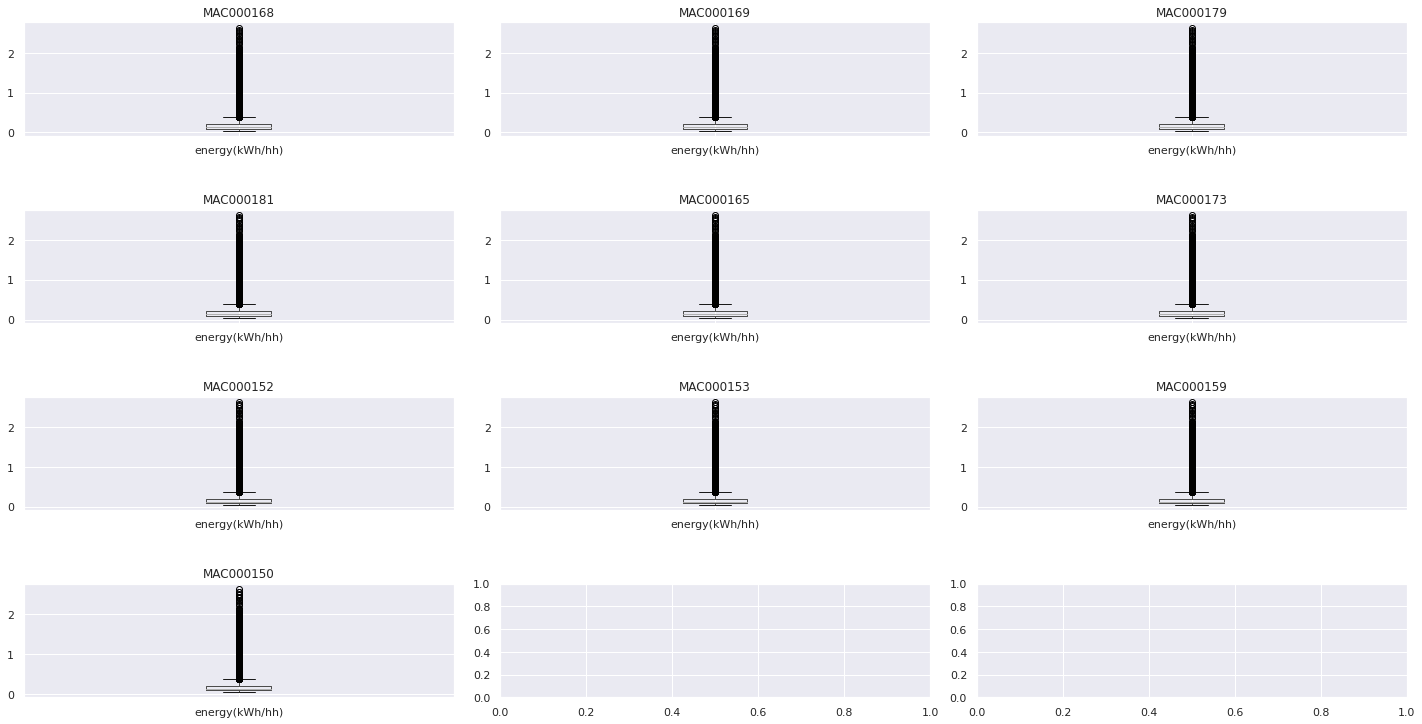

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
fig.tight_layout(h_pad=5)

col = 0
row = 0
for house in unique_households:
    temp_filt = h_df["LCLid"] == "MAC000150"
    temp_df = h_df[hh_filt]
    
    axes[row, col].set_title(house)
    hh_df.boxplot(ax=axes[row,col])
    col += 1
    if col == 3:
        col = 0
        row += 1


<AxesSubplot:>

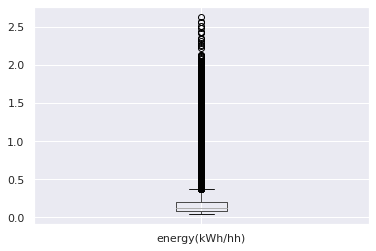

In [17]:
hh_df.boxplot()

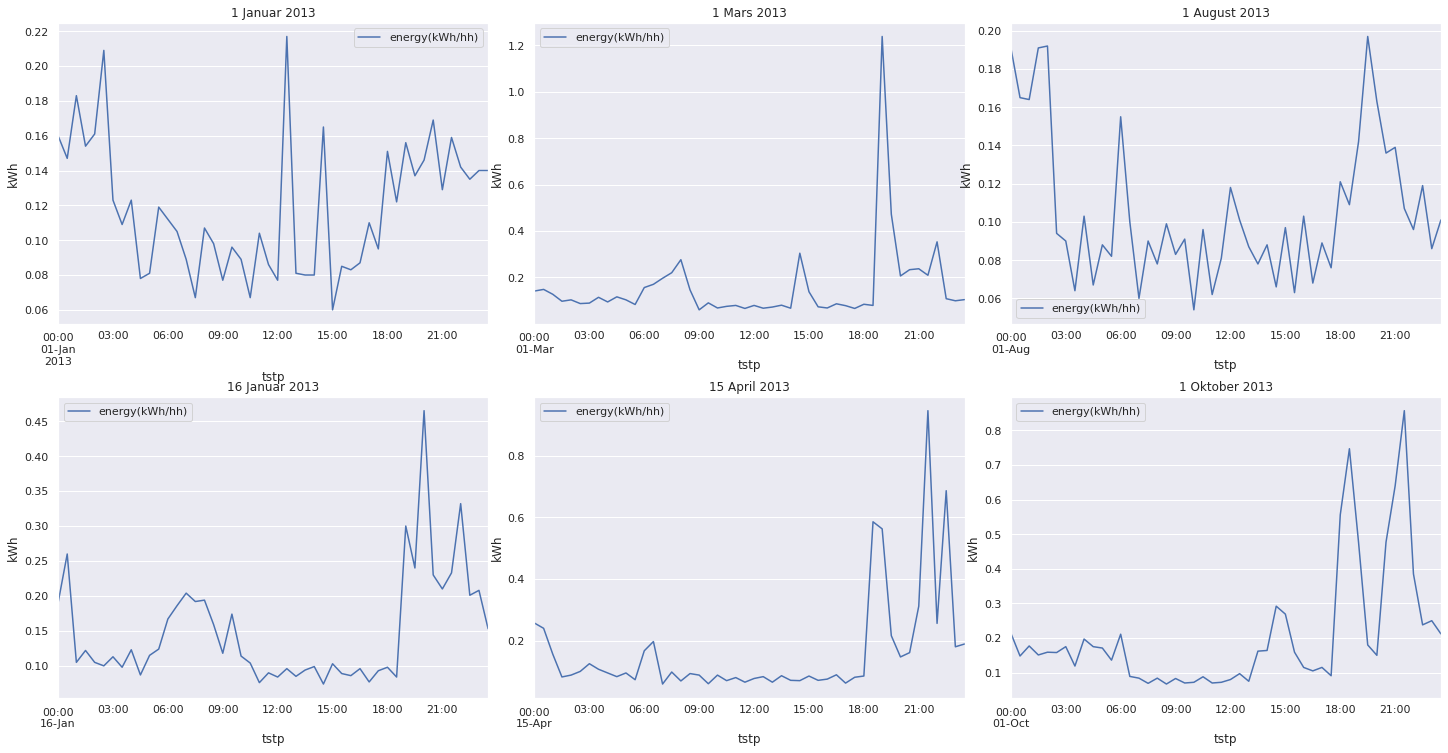

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.tight_layout(h_pad=5)

hh_df.loc["2013-01-01"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "1 Januar 2013", ax=axes[0,0] )
hh_df.loc["2013-01-16"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "16 Januar 2013", ax=axes[1,0])

hh_df.loc["2013-03-01"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "1 Mars 2013", ax=axes[0,1] )
hh_df.loc["2013-04-15"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "15 April 2013", ax=axes[1,1] )


hh_df.loc["2013-08-01"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "1 August 2013", ax=axes[0,2] )
hh_df.loc["2013-10-01"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title = "1 Oktober 2013", ax=axes[1,2] )


plt.show()


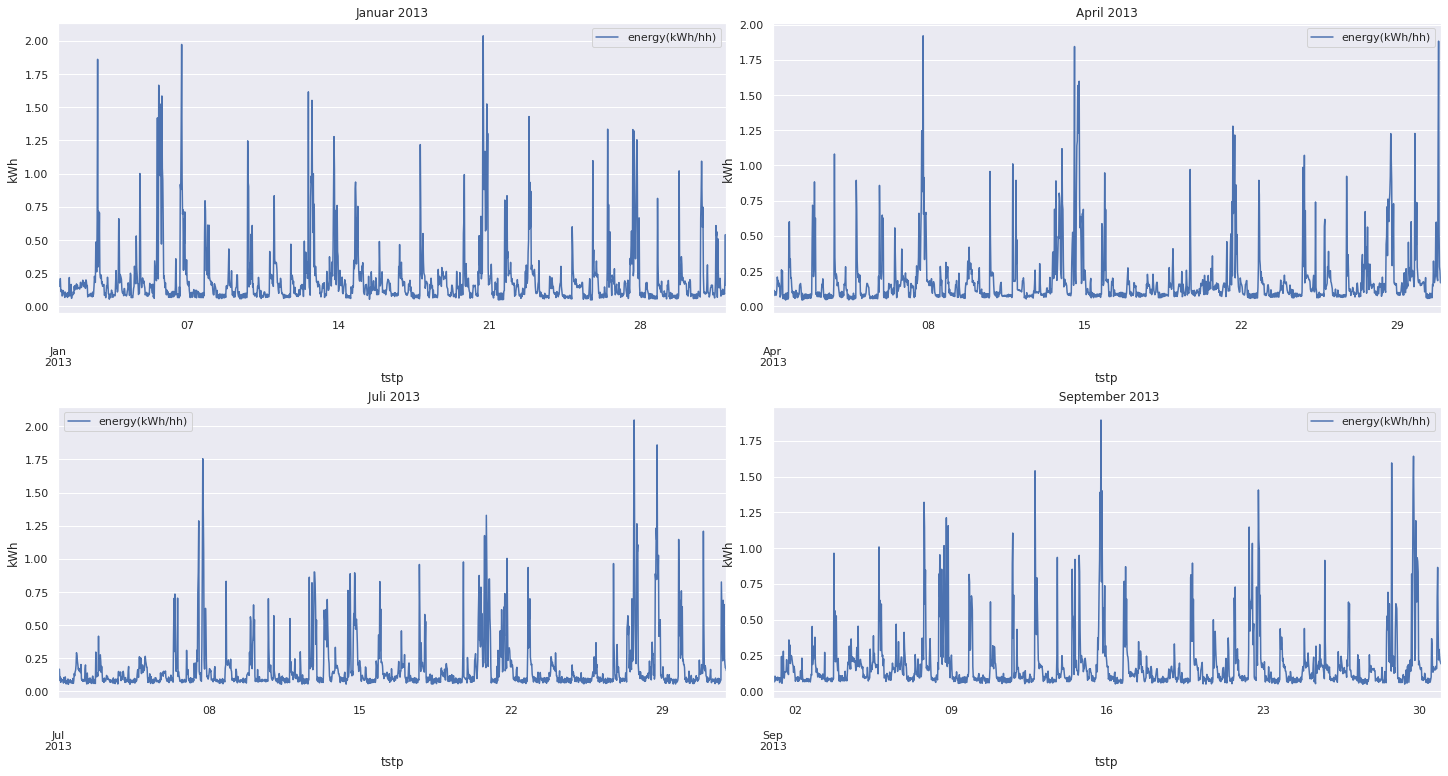

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.tight_layout(h_pad=7)

hh_df.loc["2013-01-01":"2013-01-31"].plot( y ="energy(kWh/hh)", ylabel = "kWh", title="Januar 2013", ax=axes[0,0])
hh_df.loc["2013-04-01":"2013-04-30"].plot( y ="energy(kWh/hh)",  ylabel = "kWh", title="April 2013", ax=axes[0,1] )
hh_df.loc["2013-07-01":"2013-07-31"].plot( y ="energy(kWh/hh)",  ylabel = "kWh", title=" Juli 2013", ax=axes[1,0])
hh_df.loc["2013-09-01":"2013-09-30"].plot( y ="energy(kWh/hh)",  ylabel = "kWh", title=" September 2013", ax=axes[1,1])



plt.show()

<AxesSubplot:title={'center':'2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

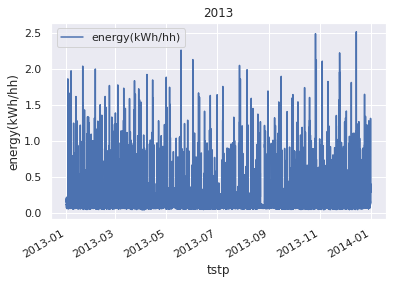

In [20]:
hh_df.loc["2013-01-01":"2013-12-31"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="2013" )

<AxesSubplot:title={'center':'uke i oktober'}, xlabel='tstp', ylabel='kWh/hh'>

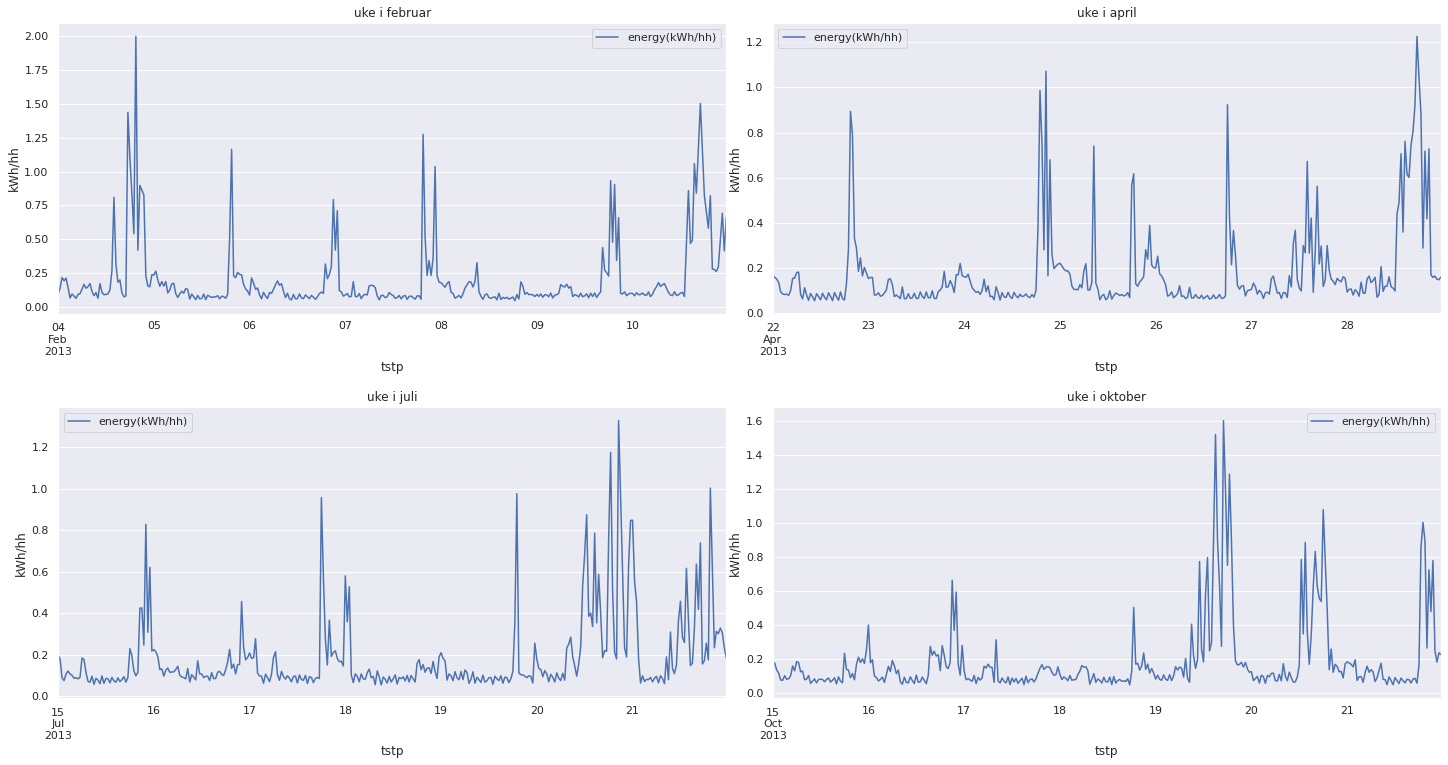

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.tight_layout(h_pad=7)

hh_df.loc["2013-02-04":"2013-02-10"].plot( y ="energy(kWh/hh)", ylabel = "kWh/hh", title="uke i februar", ax=axes[0,0] )
hh_df.loc["2013-04-22":"2013-04-28"].plot( y ="energy(kWh/hh)", ylabel = "kWh/hh", title="uke i april", ax=axes[0,1] )

hh_df.loc["2013-07-15":"2013-07-21"].plot( y ="energy(kWh/hh)", ylabel = "kWh/hh", title="uke i juli", ax=axes[1,0] )
hh_df.loc["2013-10-15":"2013-10-21"].plot( y ="energy(kWh/hh)", ylabel = "kWh/hh", title="uke i oktober", ax=axes[1,1] )



In [22]:
weather_data = pd.read_csv("./data/weather_hourly_darksky.csv")
weather_data.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [23]:
weather_data["time"] = pd.to_datetime(weather_data["time"])
weather_data = weather_data.set_index("time")

In [24]:
weather_data.head()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-11 00:00:00,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
2011-11-11 01:00:00,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2011-11-11 02:00:00,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
2011-11-11 03:00:00,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
2011-11-11 04:00:00,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [25]:
hourly_df = hh_df.resample("H").sum()

In [26]:
print(h_df)

                         LCLid  energy(kWh/hh)
tstp                                          
2011-11-24 13:30:00  MAC000168           0.054
2011-11-24 14:00:00  MAC000168           0.178
2011-11-24 14:30:00  MAC000168           0.113
2011-11-24 15:00:00  MAC000168           0.068
2011-11-24 15:30:00  MAC000168           0.061
...                        ...             ...
2014-02-27 22:00:00  MAC000150           0.631
2014-02-27 22:30:00  MAC000150           0.178
2014-02-27 23:00:00  MAC000150           0.108
2014-02-27 23:30:00  MAC000150           0.078
2014-02-28 00:00:00  MAC000150           0.113

[396562 rows x 2 columns]


In [27]:
hourly_df.loc[:].index.to_series()

tstp
2011-11-23 10:00:00   2011-11-23 10:00:00
2011-11-23 11:00:00   2011-11-23 11:00:00
2011-11-23 12:00:00   2011-11-23 12:00:00
2011-11-23 13:00:00   2011-11-23 13:00:00
2011-11-23 14:00:00   2011-11-23 14:00:00
                              ...        
2014-02-27 20:00:00   2014-02-27 20:00:00
2014-02-27 21:00:00   2014-02-27 21:00:00
2014-02-27 22:00:00   2014-02-27 22:00:00
2014-02-27 23:00:00   2014-02-27 23:00:00
2014-02-28 00:00:00   2014-02-28 00:00:00
Freq: H, Name: tstp, Length: 19863, dtype: datetime64[ns]

In [28]:
weather_data_f = weather_data["2012-10-12 00:00:00":"2014-02-28 00:00:00"]
weather_data_f

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2012-11-25 00:00:00,4.09,135,10.19,9.97,992.53,10.19,5.62,rain,partly-cloudy-night,0.99,Mostly Cloudy
2012-11-25 01:00:00,7.45,170,11.67,11.39,990.38,11.67,6.70,rain,partly-cloudy-night,0.98,Mostly Cloudy
2012-11-25 02:00:00,8.95,208,12.54,11.32,989.61,12.54,7.97,rain,wind,0.92,Breezy and Mostly Cloudy
2012-11-25 03:00:00,13.50,244,11.39,9.14,992.15,11.39,11.02,rain,wind,0.86,Breezy and Partly Cloudy
2012-11-25 04:00:00,13.50,248,10.26,7.66,994.81,10.26,11.31,rain,wind,0.84,Windy and Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
2014-02-15 19:00:00,12.68,247,7.39,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
2014-02-15 20:00:00,13.78,249,6.56,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
2014-02-15 21:00:00,14.31,248,6.47,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear


In [29]:
weather_data_f["energy(kWh/hh)"] = hourly_df["energy(kWh/hh)"]

In [30]:
#normalization
temp_max  = weather_data_f["temperature"].max()
temp_mean =weather_data_f["temperature"].mean()
temp_sd = weather_data_f["temperature"].std()
#weather_data_f["temperature"] = (weather_data_f["temperature"] - temp_mean) / temp_sd

<AxesSubplot:xlabel='time'>

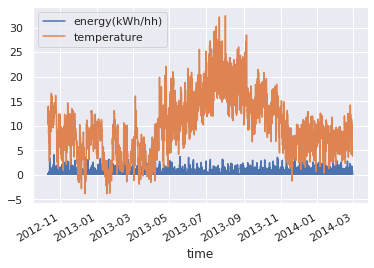

In [31]:
weather_data_f.plot(y=["energy(kWh/hh)", "temperature"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='energy(kWh/hh)', ylabel='temperature'>

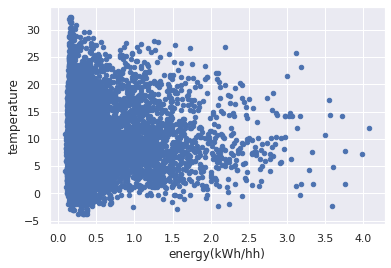

In [32]:
weather_data_f.plot.scatter(y="temperature", x="energy(kWh/hh)")

Lets find temperature correlation for all households, turned into own python script, maybe expand on it


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

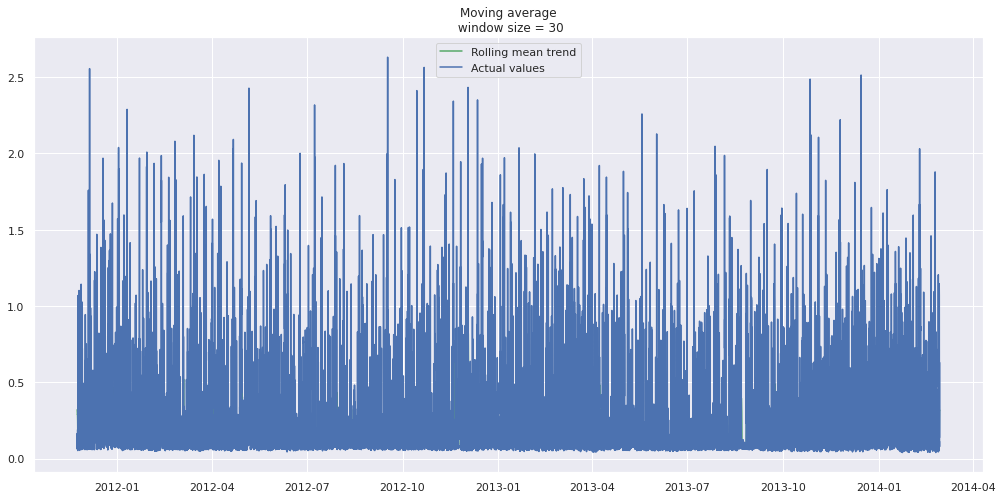

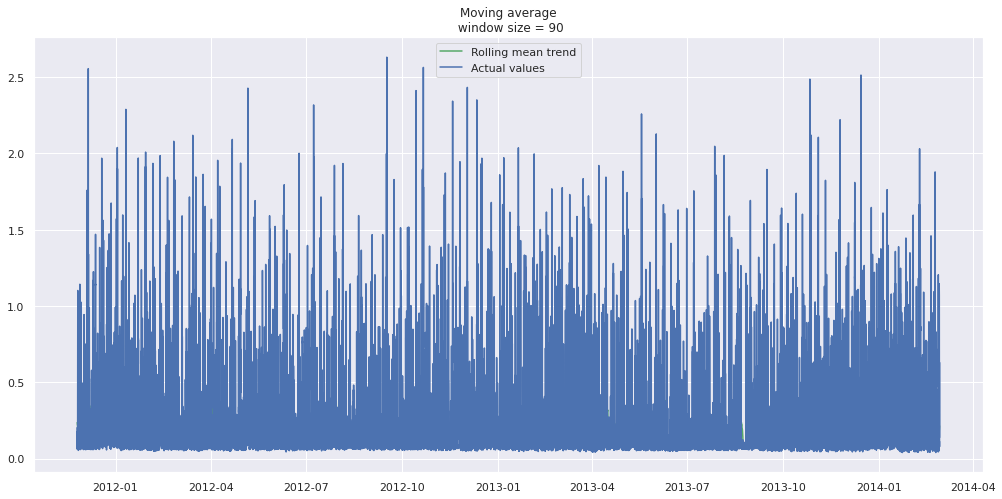

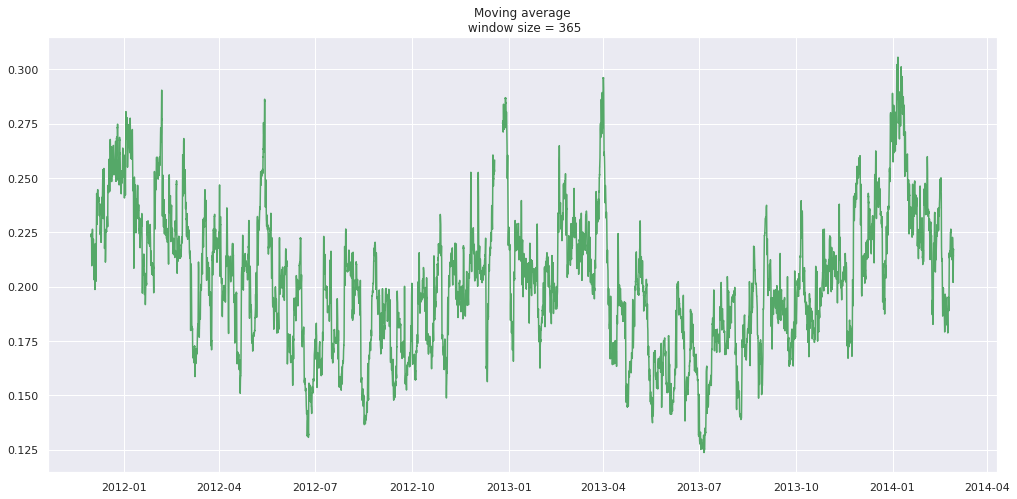

In [33]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)

plot_moving_average(hh_df["energy(kWh/hh)"] , 30)

#Smooth by the previous month (30 days)
plot_moving_average(hh_df["energy(kWh/hh)"] , 90)

#Smooth by previous quarter (90 days)
plot_moving_average(hh_df["energy(kWh/hh)"] , 365, plot_intervals=True)

In [ ]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(hh_df["energy(kWh/hh)"], [0.05, 0.3])

In [ ]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(hh_df["energy(kWh/hh)"], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(hh_df["energy(kWh/hh)"], lags=30)

# Take the first difference to remove to make the process stationary
data_diff = hh_df["energy(kWh/hh)"] - hh_df["energy(kWh/hh)"].shift(1)

tsplot(data_diff[1:], lags=30)